In [1]:
import numpy as np
from scipy.stats import norm
from sif.samplers import EllipticalSliceSampler

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Set the mean and variance of two Gaussian densities. One of these will be regarded as the prior, while the other will represent the likelihood. Fortunately, the product of two Gaussian densities can be regarded as an unnormalized Gaussian density with closed-form expressions for the mean and variance.

In [3]:
mu_1, mu_2 = 5., 1.
sigma_1, sigma_2 = 1., 2.

In [4]:
mu = ((sigma_1**-2) * mu_1 + (sigma_2**-2) * mu_2) / (sigma_1**-2 + sigma_2**-2)
sigma = np.sqrt((sigma_1**2 * sigma_2**2) / (sigma_1**2 + sigma_2**2))

Create the log-likelihood function.

In [5]:
def log_likelihood_func(f):
    return norm.logpdf(f, mu_2, sigma_2)

Now perform sampling from the "posterior" using elliptical slice sampling.

In [6]:
n_samples = 10000
sampler = EllipticalSliceSampler(np.array([mu_1]), np.diag(np.array([sigma_1**2, ])), log_likelihood_func)
samples = sampler.sample(n_samples, burnin=1000)

Visualize the samples and compare to the true "posterior".

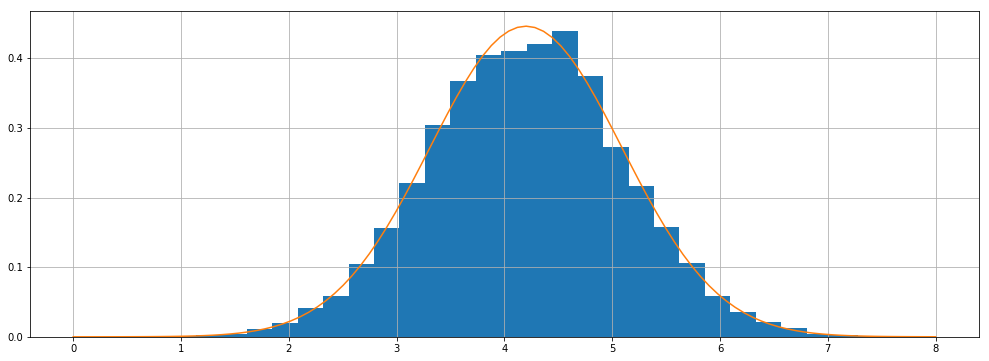

In [8]:
r = np.linspace(0., 8., num=100)
plt.figure(figsize=(17, 6))
plt.hist(samples, bins=30, density=True)
plt.plot(r, norm.pdf(r, mu, sigma))
plt.grid()
plt.show()